In [2]:
using Plots
using LaTeXStrings
using Symbolics
using TaylorSeries
using Roots

# Lucas Schmidt Ferreira de Araujo

# List 01 - Pertubation Methods

## Problem 01

We have the equation:

$$ x^2 + \epsilon x - 1 = 0 $$

with solutions

$$ x(\epsilon) = \frac{-\epsilon \pm \sqrt{\epsilon^2 + 4} }{2} $$

The solution for the unperturbed problem is:

$$ x_0 = \pm 1 $$

### Expansion Method

We have

$$ x(\epsilon) = x_0 + x_1 \epsilon^{\alpha_1} +  x_2 \epsilon^{\alpha_2}, \quad \alpha_1 < \alpha_2$$

Subustituting in the equation we have

$$ x_0^2 - 1 + \epsilon^{2\alpha_2}x_2^2 + \epsilon^{2\alpha_1}x_1^2 + 2(x_0 x_1 \epsilon^{\alpha_1} + x_0 x_2 \epsilon^{\alpha_2} + x_1 x_2 \epsilon^{\alpha_1 + \alpha_2}) + \epsilon x_0 + \epsilon^{\alpha_1 + 1} + \epsilon^{\alpha_2+1} = 0 $$

Chosing $\alpha_1 = 1,\alpha_2 = 2$ and aggrupating the terms we have

$$ \epsilon^2(x_1^2 + 2x_0x_2 + x_1) = 0  $$

$$ \epsilon(2x_0x1 + x_0) = 0$$

Then

$$ x_1^{(1)} = -\frac{1}{2}, \quad x_2^{(1)} = \frac{1}{8}$$

$$ x_1^{(2)} = -\frac{1}{2}, \quad x_2^{(2)} = -\frac{1}{8}$$

We have then

$$ x^{(1)}(\epsilon) = 1 -\frac{1}{2} \epsilon + \frac{1}{8} \epsilon^2 + O(\epsilon^3)$$

$$ x^{(2)}(\epsilon) = -1 -\frac{1}{2} \epsilon - \frac{1}{8} \epsilon^2 +O(\epsilon^3)$$

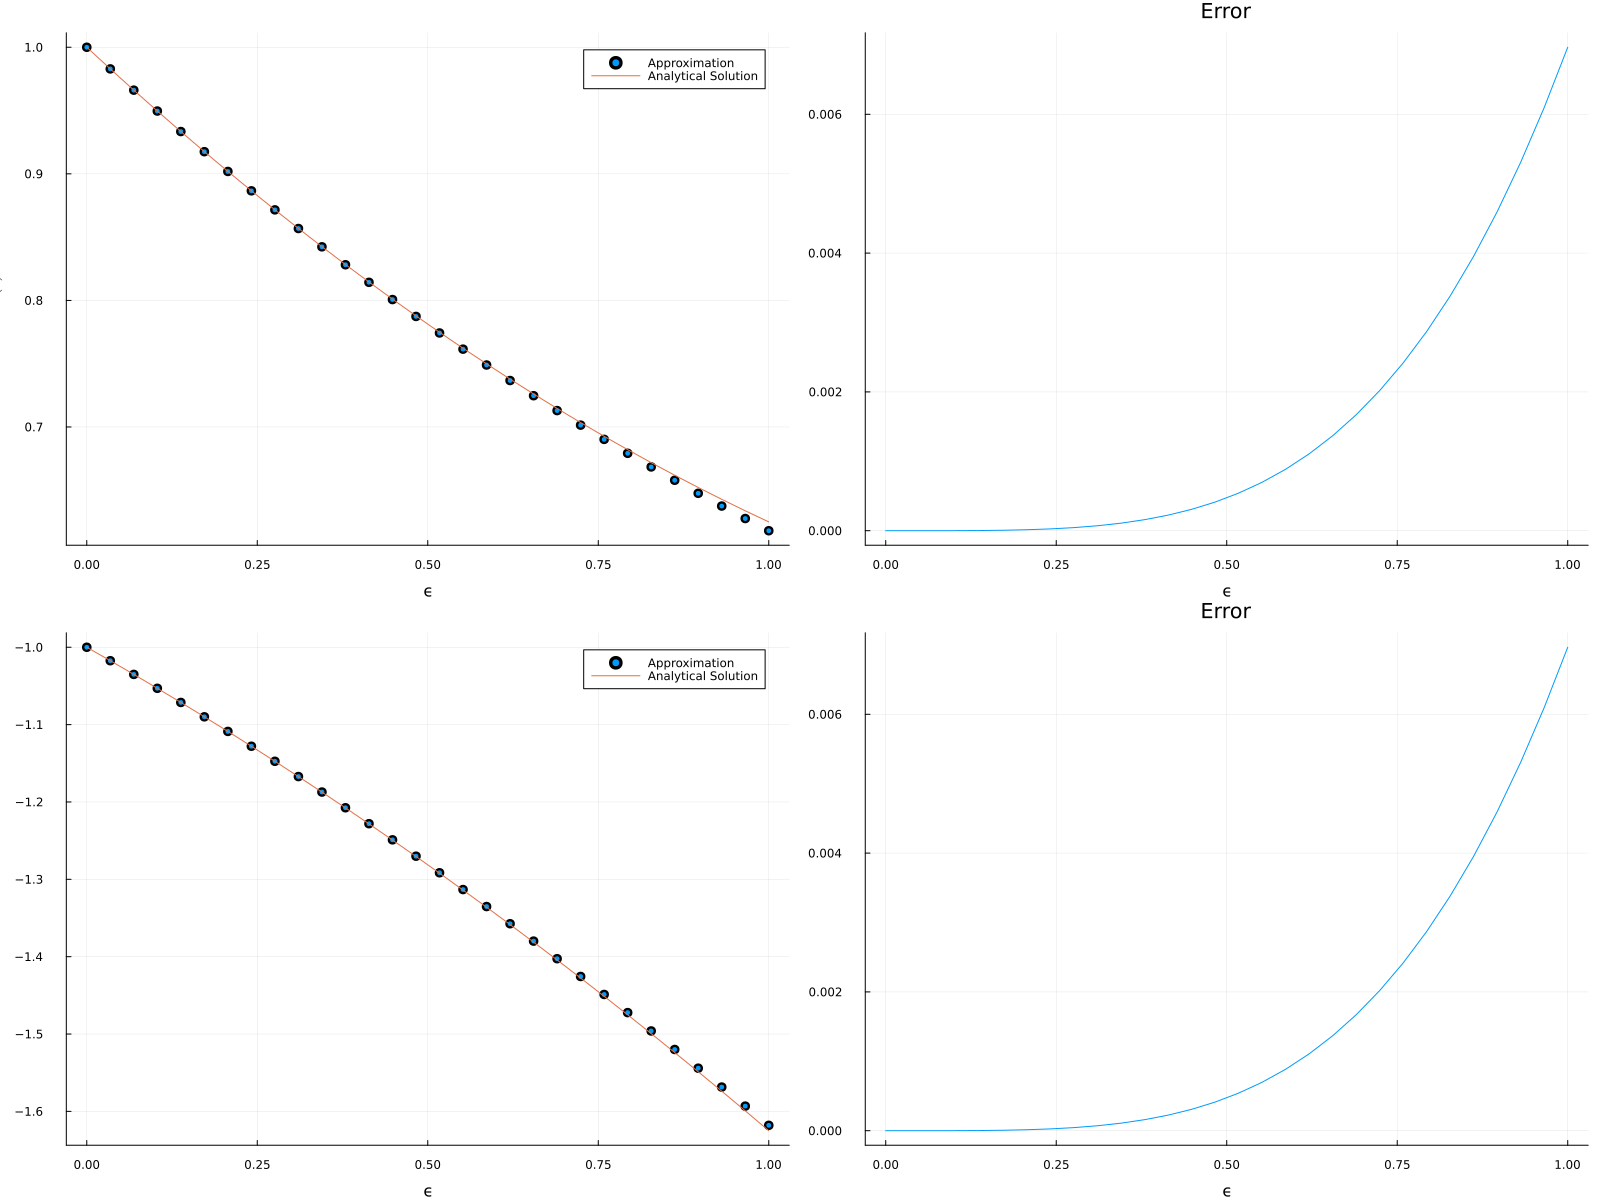

In [2]:
function x1_analitical(ϵ)
    return (-ϵ + sqrt(ϵ^2 + 4) ) * .5
end

function x2_analitical(ϵ)
    return (-ϵ - sqrt(ϵ^2 + 4) ) * .5
end

function x1_expanded(ϵ)
    x1 = -.5
    x2 = 1/8
    return 1 + x1 * ϵ + x2 * ϵ^2
end

function x2_expanded(ϵ)
    x1 = -.5
    x2 = -1/8
    return -1 + x1 * ϵ + x2 * ϵ^2
end

ϵ = range(0,1,30)

p1 = scatter(ϵ,x1_analitical.(ϵ) , label = "Approximation" , ylabel = L"x(ϵ)")
plot!(ϵ,x1_expanded.(ϵ) , label = "Analytical Solution")
p2 = plot(ϵ , abs.( x1_analitical.(ϵ) .- x1_expanded.(ϵ)) , title = "Error" , label = false)

p3 = scatter(ϵ,x2_analitical.(ϵ) , label = "Approximation")
plot!(ϵ,x2_expanded.(ϵ) , label = "Analytical Solution")
p4 = plot(ϵ , abs.( x2_analitical.(ϵ) .- x2_expanded.(ϵ)) , title = "Error" , label = false)

plot(p1,p2 , p3 , p4 , size = (1600,1200) , xlabel = "ϵ")

## Problem 02

We notice that the original equation represents a small pertubation of the unperturbed equation

$$ x^3 - 4x = 0, \implies x^{(1)}_0 = 0, \quad x^{(2)}_0 = 2 , \quad x^{(3)}_0 = -2$$

The pertubated equation is:

$$ x^3 - (4+\epsilon)x + 2\epsilon = 0$$

Using the expansion method, a two-term solution is of the form

$$ x(\epsilon) = x_0 + a \epsilon^{\alpha_1} + O(\epsilon^2)$$

### Case 1:

$$x^{(1)}_0 = 0$$ 

The expanded equaiton is:

In [3]:
x0 = 0
@variables ϵ a α1
x = x0 + a*ϵ^α1
eq = expand(x^3 - (4+ϵ)*x + 2*ϵ)

2ϵ - 4a*(ϵ^α1) - a*(ϵ^α1)*ϵ + (a^3)*(ϵ^(3α1))

Chosing $\alpha_1 = 1$ we have

$$ \epsilon(2 - 4a) = 0 \implies a = \frac{1}{2}$$

$$ x(\epsilon) = \frac{\epsilon}{2} + O(\epsilon^2) $$

### Case 2:

$$ x_0^{(2)} = -2 $$

In [4]:
x0 = -2
@variables ϵ a α1
x = x0 + a*ϵ^(α1)
eq = expand(x^3 - (4+ϵ)*x + 2*ϵ)

4ϵ + 8a*(ϵ^α1) - 6(a^2)*(ϵ^(2α1)) - a*(ϵ^α1)*ϵ + (a^3)*(ϵ^(3α1))

Chosing $\alpha_1 = 1$, we have

$$ \epsilon(4 + 8a) = 0 \implies a = -\frac{1}{2} $$

$$ x(\epsilon) = -2 -\frac{\epsilon}{2} + O(\epsilon^2) $$

### Case 3:

$$ x_0^{(3)} = 2$$

The expanded equation is:

In [5]:
x0 = 2
@variables ϵ a α1
x = x0 + a*ϵ^(α1)
eq = expand(x^3 - (4+ϵ)*x + 2*ϵ)

8a*(ϵ^α1) + 6(a^2)*(ϵ^(2α1)) - a*(ϵ^α1)*ϵ + (a^3)*(ϵ^(3α1))

We notice that the only possible solution is $a = 0$. Then we have

$$ x(\epsilon) = 2 + O(\epsilon^2)$$

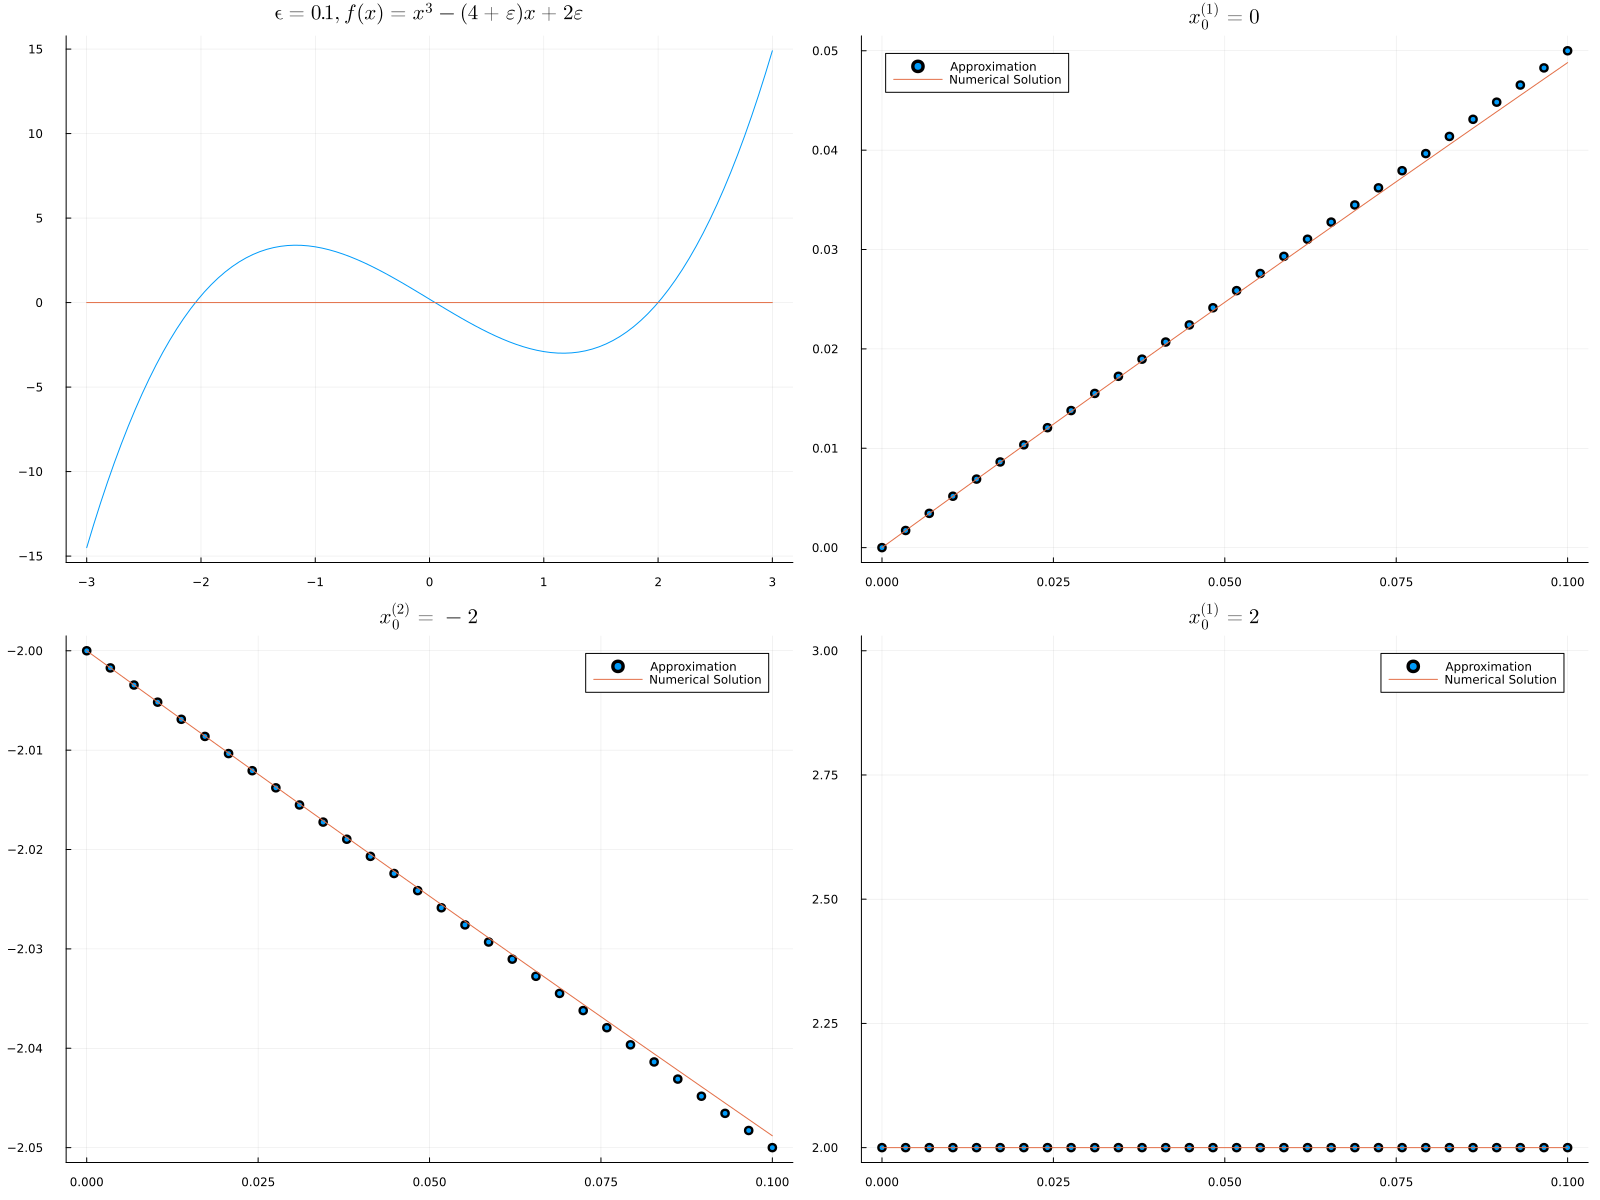

In [6]:
x = range(-3,3,100)
ϵ = range(0,.1,30)
ϵ_ = .1
function f(x,ϵ)
    return x^3 -(4+ϵ)*x + 2*ϵ 
end

function x1(ϵ)
    return find_zero(x->f(x,ϵ) , 0)
end

function x2(ϵ)
    return find_zero(x->f(x,ϵ) , -3)
end

function x3(ϵ)
    return find_zero(x->f(x,ϵ) , 2)
end

function x1_appr(ϵ)
    return ϵ/2
end

function x2_appr(ϵ)
    return -2 -.5* ϵ
end

function x3_appr(ϵ)
    return 2
end

p1 = plot( x , f.( x, ϵ_) , title = L"ϵ=0.1 , f(x) = x^3 - (4+\epsilon)x + 2\epsilon" , label = false ) 
plot!(x , 0*x , label = false)

p2 = scatter( ϵ , x1_appr.(ϵ), title = L"x_0^{(1)} = 0" , label = "Approximation")
plot!(ϵ , x1.(ϵ) , label = "Numerical Solution") 

p3 = scatter( ϵ , x2_appr.(ϵ) , title = L"x_0^{(2)} = -2" , label = "Approximation")
plot!(ϵ , x2.(ϵ) , label = "Numerical Solution") 

p4 = scatter( ϵ , x3_appr.(ϵ) , title = L"x_0^{(1)} = 2" , label = "Approximation")
plot!(ϵ , x3.(ϵ) , label = "Numerical Solution") 

plot(p1,p2,p3,p4, size = (1600,1200))

## Problem 03

We have the equation 


$$ \epsilon x^2 - x + 1 = 0 , \quad \epsilon << 1$$

The analitical solution is:

$$ x = \frac{1 \pm \sqrt{1 - 4\epsilon}}{2 \epsilon} $$

and we want to find a three-therm solution of the kind

$$ x(\epsilon) = x_0 + a\epsilon^{\alpha_1} + b\epsilon^{\alpha_2} + O(\epsilon^3) $$

We notice that one of the unperturbed solutions, is solution of the degenerate equation

$$ x_0^{(1)} = 1$$

Then

$$ x^{(1)}(\epsilon) = 1 + a\epsilon^{\alpha_1} + b\epsilon^{\alpha_2} + O(\epsilon^3) $$

and chosing $\alpha_1 = 1 , \alpha_2 = 2$, we have

In [7]:
x0 = 1
@variables ϵ a b
x = x0 + a*ϵ^1 + b*ϵ^2
eq = expand(ϵ*x^2 - x + 1)

ϵ - a*ϵ + 2a*(ϵ^2) - b*(ϵ^2) + 2b*(ϵ^3) + (a^2)*(ϵ^3) + 2a*b*(ϵ^4) + (b^2)*(ϵ^5)

In [8]:
[ Symbolics.coeff(eq, ϵ^(0)) , Symbolics.coeff(eq, ϵ^(1)) , Symbolics.coeff(eq, ϵ^(2)) ] ### Get List of Coefficients

3-element Vector{Any}:
 0
  1 - a
  2a - b

Solving, we have

$$ a = 1 , b = 2 $$

Then

$$ x^{(1)}(\epsilon) = 1 + 1\epsilon + 2\epsilon^{2} + O(\epsilon^3) $$

## Method of Dominant Balance

We have the transformation

$$ x(\epsilon) = \frac{y(\epsilon)}{\delta(\epsilon)} \implies \epsilon \frac{y^2(\epsilon)}{\delta^2(\epsilon)} - \frac{y(\epsilon)}{\delta(\epsilon)} + 1 = 0$$

We want a function $\delta(\epsilon)$ such that

$$  1 << \frac{\epsilon}{\delta^2(\epsilon)} $$

and

$$ \frac{\epsilon}{\delta^2(\epsilon)} \sim \frac{1}{\delta(\epsilon)} \implies \delta(\epsilon) \sim \epsilon $$

Chosing $\delta(\epsilon) = \epsilon$ we have

$$ y^2 - y + \epsilon = 0 $$

where $y_0^{(1)} = 0 , y_0^{(2)} = 1$ and

$$ y(\epsilon) = y_0 + a \epsilon + b \epsilon^2 + O(\epsilon^3) $$

b.) $$ y_0^{(1)} = 1 $$

Expanding and noticing that $\alpha_1=1$ is a solution, we have:

In [9]:
y0 = 1
@variables a , ϵ ,b
y = y0 + a * ϵ + b * ϵ^2
eq = expand(y^2 - y + ϵ)

ϵ + a*ϵ + b*(ϵ^2) + (a^2)*(ϵ^2) + 2a*b*(ϵ^3) + (b^2)*(ϵ^4)

In [10]:
[ Symbolics.coeff(eq, ϵ^(0)) , Symbolics.coeff(eq, ϵ^(1)) , Symbolics.coeff(eq, ϵ^(2)) ] ### Get List of Coefficients

3-element Vector{Any}:
 0
  1 + a
  b + a^2

Solving we have 

$$ a = -1 $$

$$ b =  -1 $$

Then:

$$ y(\epsilon) = 1 - \epsilon  - \epsilon^2$$

$$ x^{(2)}(\epsilon) = \frac{1}{\epsilon} - 1 - \epsilon$$

In [11]:
y0 = 0
@variables a , ϵ , b
y = y0 + a * ϵ + b * ϵ^2
eq = expand(y^2 - y + ϵ)

ϵ - a*ϵ - b*(ϵ^2) + (a^2)*(ϵ^2) + 2a*b*(ϵ^3) + (b^2)*(ϵ^4)

In [12]:
[ Symbolics.coeff(eq, ϵ^(0)) , Symbolics.coeff(eq, ϵ^(1)) , Symbolics.coeff(eq, ϵ^(2)) ] ### Get List of Coefficients

3-element Vector{Any}:
 0
  1 - a
  -b + a^2

Solving, we have

$$ a = 1 $$

$$ b = 1 $$

$$ y(\epsilon) = \epsilon + \epsilon^2 $$

$$ x^{(3)}(\epsilon) = 1 + \epsilon $$

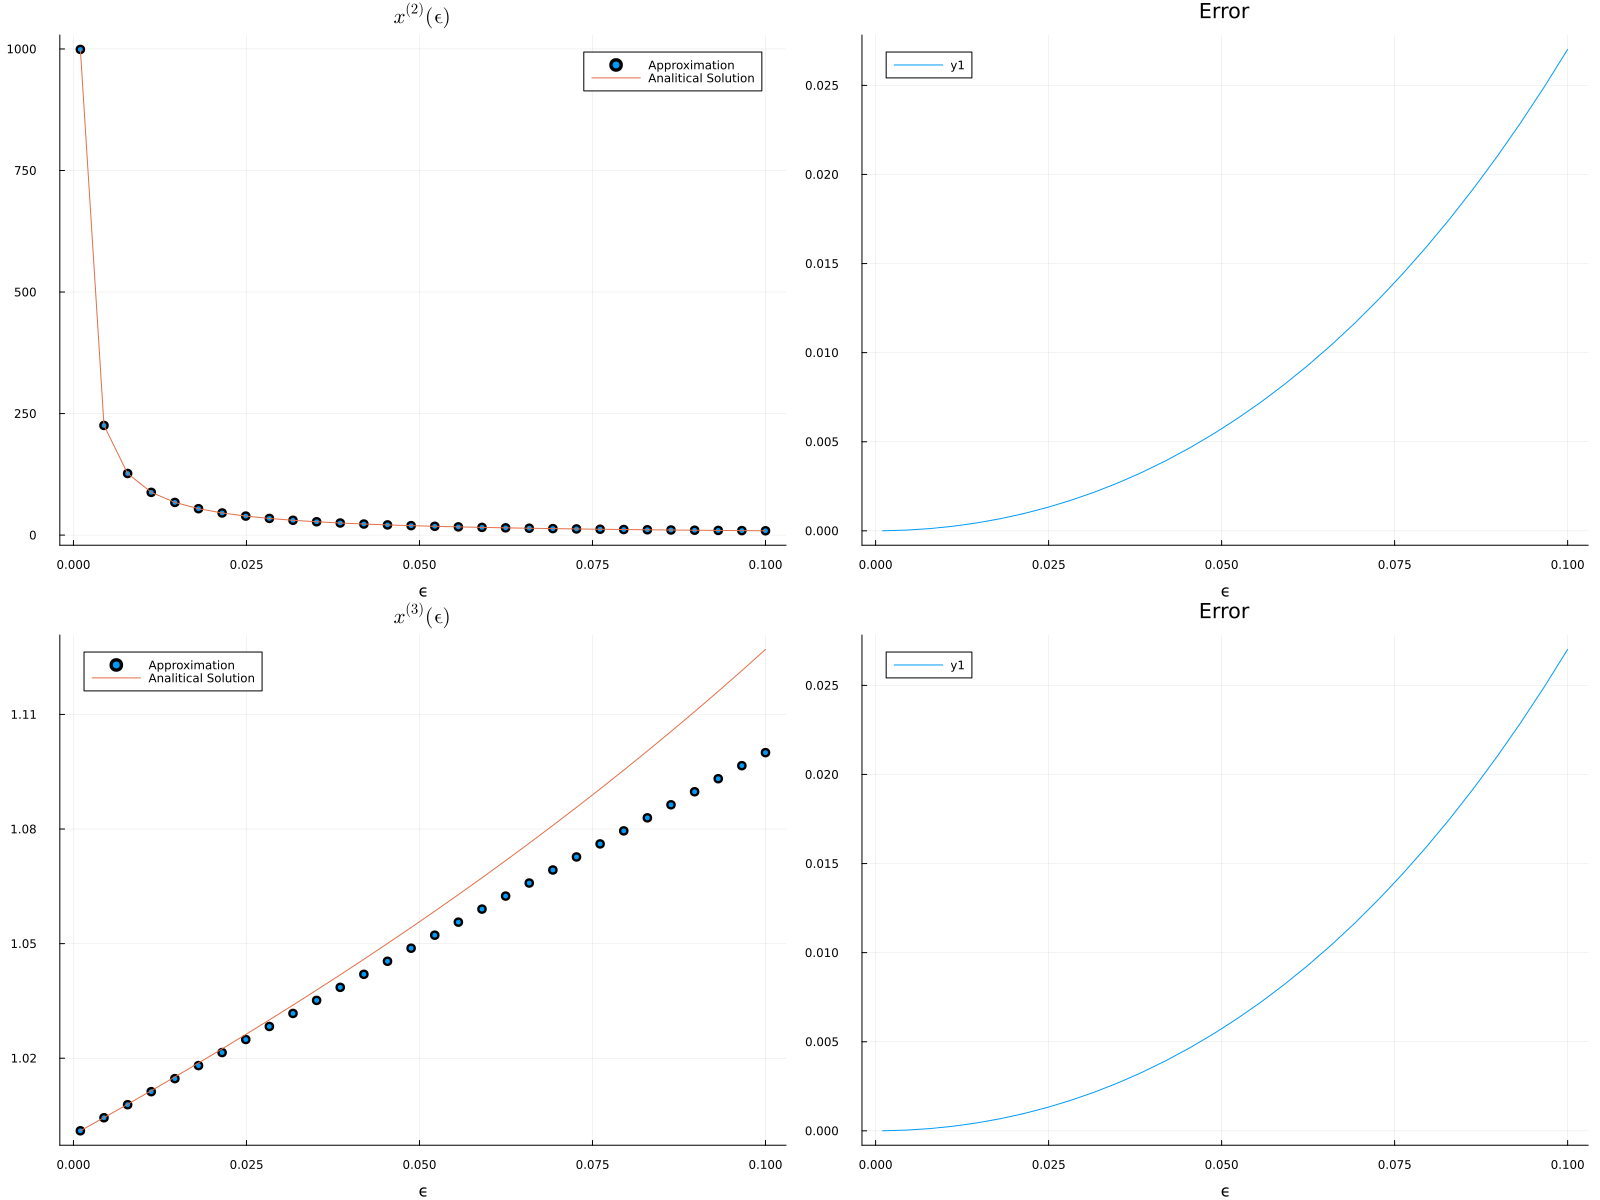

In [13]:
x2_analitical(ϵ) = (1 + sqrt(1 - 4*ϵ) ) / (2*ϵ)
x3_analitical(ϵ) = (1 - sqrt(1 - 4*ϵ) ) / (2*ϵ)

x2(ϵ) = -1 -ϵ + 1/ϵ
x3(ϵ) = 1 + ϵ

ϵ = range(0.001,.1,30)

p1 = scatter(ϵ , x2.(ϵ) , label = "Approximation" , title = L"x^{(2)}(ϵ)")
plot!(ϵ , x2_analitical.(ϵ) , label = "Analitical Solution")


p2 = plot(ϵ , abs.(x2.(ϵ) .- x2_analitical.(ϵ)) , title = "Error")

p3 = scatter(ϵ , x3.(ϵ) , label = "Approximation" , title = L"x^{(3)}(ϵ)")
plot!(ϵ , x3_analitical.(ϵ) , label = "Analitical Solution")

p4 = plot(ϵ , abs.(x3.(ϵ) .- x3_analitical.(ϵ)) , title = "Error")

plot(p1, p2 , p3, p4 , xlabel = "ϵ" , size = (1600,1200) )

## Problem 04

We have the equation

$$ (1-\epsilon)x^2 - 2x + 1 = 0 $$

With solutions

$$ x = \frac{1 \pm \sqrt{\epsilon} }{(1-\epsilon)} $$ 

The unperturbed solution is given by $\epsilon=0$. Then:

$$ x_0^2 - 2x_0 + 1 = 0  \implies x_0 = 1$$

Let's explore the solution of the form

$$ x(\epsilon) = x_0 + a \epsilon + b \epsilon^2 + O(\epsilon) $$

For $$ x_0 = 1 $$

In [14]:
x0 = 1
@variables a , ϵ , b
x = x0 + a * ϵ + b * ϵ^2
eq = expand( (1-ϵ)*x^2 - 2*x + 1 )

-ϵ - 2a*(ϵ^2) + (a^2)*(ϵ^2) - 2b*(ϵ^3) - (a^2)*(ϵ^3) + 2a*b*(ϵ^3) - 2a*b*(ϵ^4) + (b^2)*(ϵ^4) - (b^2)*(ϵ^5)

In [15]:
[ Symbolics.coeff(eq, ϵ^(0)) , Symbolics.coeff(eq, ϵ^(1)) , Symbolics.coeff(eq, ϵ^(2)) ] ### Get List of Coefficients

3-element Vector{Any}:
  0
 -1
   -2a + a^2

Which leads to a contradiction $-1=0$

Let's explore a solution of the kind

$$ x(\epsilon) = x_0 + a \epsilon^{\alpha} + b \epsilon^{\beta} + O(\epsilon^3) , \quad x_0 = 1, \quad \alpha < \beta $$

In [16]:
x0 = 1
@variables a , ϵ , b , α , β
x = x0 + a * ϵ^(α) + b * ϵ^β
eq = expand( (1-ϵ)*x^2 - 2*x + 1 )

-ϵ + (a^2)*(ϵ^(2α)) - 2a*(ϵ^α)*ϵ + (b^2)*(ϵ^(2β)) - 2b*(ϵ^β)*ϵ - (a^2)*(ϵ^(2α))*ϵ + 2a*b*(ϵ^α)*(ϵ^β) - (b^2)*(ϵ^(2β))*ϵ - 2a*b*(ϵ^α)*(ϵ^β)*ϵ

If we chose $\alpha = 1/2 , \beta = 1$ we have

In [17]:
x0 = 1
@variables a , ϵ , b
x = x0 + a * ϵ^(1/2) + b * ϵ
eq = expand( (1-ϵ)*x^2 - 2*x + 1 )

-ϵ - 2a*(ϵ^1.5) + (a^2)*ϵ - 2b*(ϵ^2) + 2a*b*(ϵ^1.5) - (a^2)*(ϵ^2) + (b^2)*(ϵ^2) - 2a*b*(ϵ^2.5) - (b^2)*(ϵ^3)

In [18]:
[ Symbolics.coeff(eq, ϵ^(0)) , Symbolics.coeff(eq, ϵ^(1/2)) , Symbolics.coeff(eq, ϵ^(1)) ,  Symbolics.coeff(eq, ϵ^(3/2)) ] ### Get List of Coefficients

4-element Vector{Any}:
 0
 0
  -1 + a^2
  -2a + 2a*b

$$ a = \pm 1 $$
$$ b = 1 $$

We have this way, the solutions

$$ x^{(1)}(\epsilon) = 1 +  \epsilon^{1/2} +  \epsilon + O(\epsilon^{3/2}) $$

$$ x^{(2)}(\epsilon) = 1 -  \epsilon^{1/2} +  \epsilon + O(\epsilon^{3/2}) $$

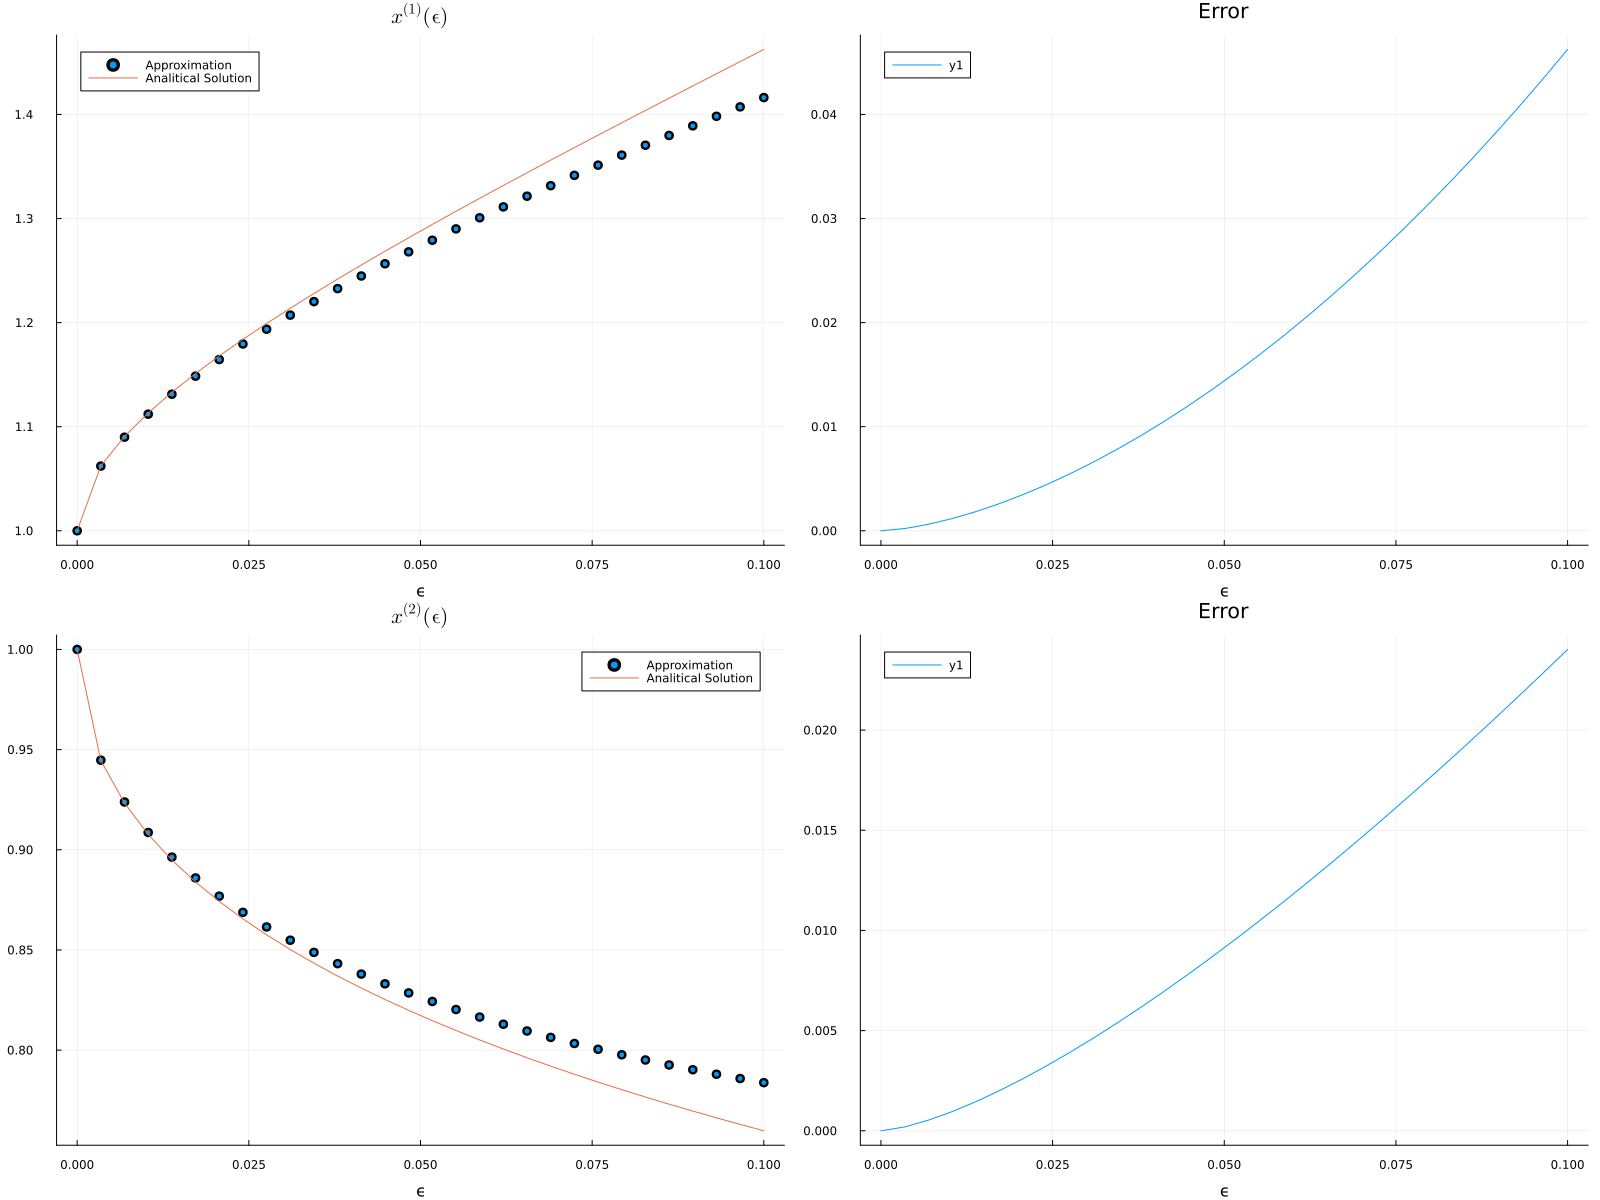

In [19]:
x1_analitical(ϵ) = (1 + sqrt(ϵ)) / (1-ϵ)
x2_analitical(ϵ) = (1 - sqrt(ϵ)) / (1-ϵ)

x1_approx(ϵ) = 1 + sqrt(ϵ) + ϵ
x2_approx(ϵ) = 1 - sqrt(ϵ) + ϵ

ϵ = range(0,.1,30)

p1 = scatter(ϵ , x1_approx.(ϵ) , label = "Approximation" , title = L"x^{(1)}(ϵ)")
plot!(ϵ , x1_analitical.(ϵ) , label = "Analitical Solution")
p2 = plot(ϵ , abs.(x1_approx.(ϵ) .- x1_analitical.(ϵ)) , title = "Error")

p3 = scatter(ϵ , x2_approx.(ϵ) , label = "Approximation" , title = L"x^{(2)}(ϵ)")
plot!(ϵ , x2_analitical.(ϵ) , label = "Analitical Solution")
p4 = plot(ϵ , abs.(x2_approx.(ϵ) .- x2_analitical.(ϵ)) , title = "Error")

plot(p1, p2 , p3, p4 , xlabel = "ϵ" , size = (1600,1200) )

## Problem 05

We have

$$ g(x,\epsilon) = 0, \quad  0 < \epsilon << 1 , g \in C^{\infty}$$

$$ g(x_0 , 0) = 0 $$

We look for an approximation for the solution of the kind:

$$ x(\epsilon) = x_0 + x_1 \epsilon + x_2 \epsilon^2  + O(\epsilon^3)$$

with

$$ x_1 = x'(0) , \quad x_2 = \frac{x''(0)}{2}$$

.a) From the chain rule, we have

$$ \frac{d}{d\epsilon} g(x,\epsilon) = g_x(x,\epsilon) x'(\epsilon) + g_{\epsilon}(x,\epsilon) = 0 \implies x_1 = -\frac{g_{\epsilon}(x(0),0)}{g_x(x(0),0)}$$

Also:

$$ \frac{d^2}{d^2\epsilon} g(x,\epsilon) = x''(\epsilon)g_x(x,\epsilon) + (x'(\epsilon))^2 g_{xx}(x,\epsilon) + x'(\epsilon)g_{x\epsilon}(x,\epsilon) + g_{\epsilon \epsilon}(x,\epsilon) = 0$$

$$ x_2 = -\frac{g_{xx}(x,0)x_1^2 + [g_{x\epsilon}(x,0) + g_{\epsilon x}(x,0)]x_1 + g_{\epsilon \epsilon}(x,0)   }{2g_x(x,0)} $$

.b) We have the function

$$ g(x,\epsilon) = e^{\epsilon x} - x^2 + 1 $$

$$ g_x(x,\epsilon) = \epsilon e^{\epsilon x} - 2x, \quad g_{xx}(x,\epsilon)  = \epsilon^2 e^{\epsilon x} - 2$$

$$ g_{\epsilon}(x,\epsilon) = x e^{\epsilon x} , g_{\epsilon \epsilon} = x^2 e^{\epsilon x}$$

$$ g_{x\epsilon} = \epsilon^2 e^{\epsilon x} , \quad g_{\epsilon x} = x^2 \epsilon^{\epsilon x}$$

This way:

$$ x_1 = -\frac{x_0}{-2x_0} = \frac{1}{2} $$

$$ x_2 = \frac{ - 2x_1^2 + x_1 x_0^2 + x_0^2}{4x_0} , \quad g(x_0,0) = 0 $$

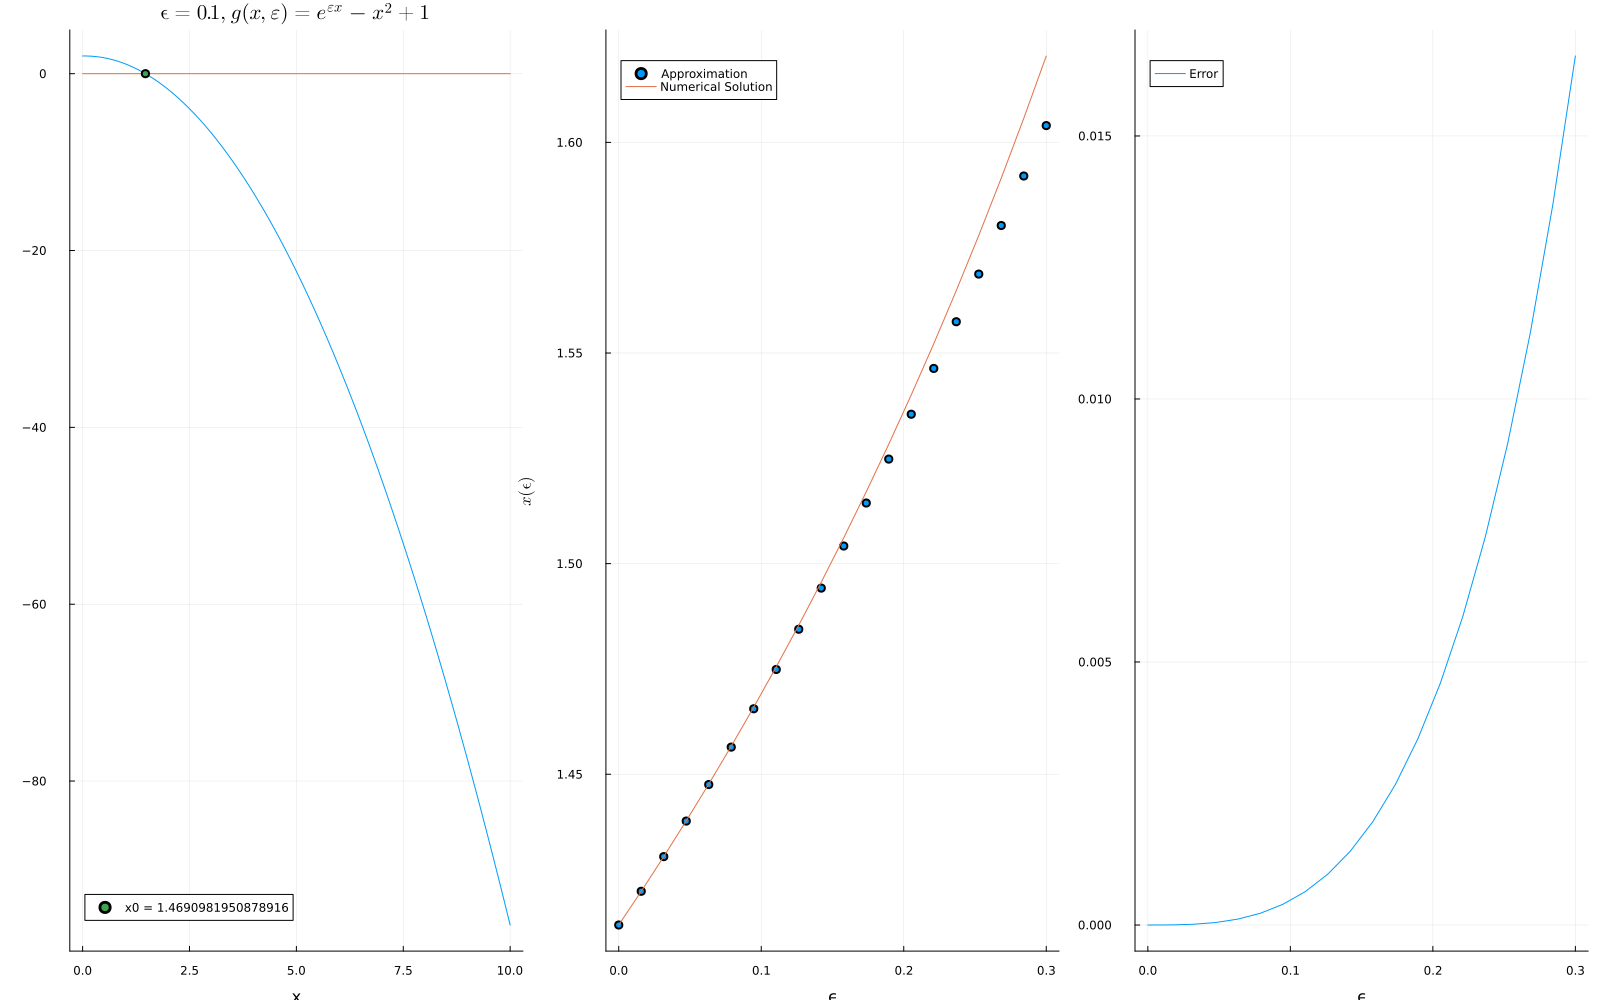

In [11]:
function g(x,ϵ)
    return exp(ϵ * x) - x^2 + 1
end

function x_approximation(ϵ)
    x0 = find_zero( x-> g(x,0) , 1 )
    x1 = .5
    x2 = (x0^2 + x1 * x0^2 - 2*x1^2) / (4*x0)
    return x0 + x1 * ϵ + x2 * ϵ^2
end

function x_numerical(ϵ)
    return find_zero( x-> g(x,ϵ) , 1 )
end

ϵ_ = .1
x = range(0,10,100)
ϵ = range(0 , .3 , 20)

p1 = plot(x , g.(x , ϵ_) , xlabel="x" , title = L"ϵ=0.1 , g(x,\epsilon) = e^{\epsilon x} - x^2 + 1" , ylabel = "g(x,ϵ)" , label = false)
plot!(x , 0*x , label =  false)
scatter!( [find_zero( x-> g(x,ϵ_) , 1 )] , [0] , label = "x0 = $(find_zero( x-> g(x,ϵ_) , 1 ))")
p2 = scatter(ϵ , x_approximation.(ϵ) , label = "Approximation" , ylabel = L"x(ϵ)", xlabel = "ϵ")
plot!( ϵ , x_numerical.(ϵ) , label = "Numerical Solution")
p3 = plot(ϵ , abs.(x_numerical.(ϵ) .- x_approximation.(ϵ)) , label = "Error" , xlabel = "ϵ")

plot(p1, p2,p3 , layout = (1,3) , size = (1600,1000) )